<a href="https://colab.research.google.com/github/Yeonwoonam0701/Python/blob/main/%EB%82%A8%EC%97%B0%EC%9A%B0_2025199653_%EA%B8%B0%EB%A7%90%EA%B3%A0%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 기말고사 코딩 문제 - 서울시 따릉이 데이터 비교 분석

이 코딩 문제는 2022년 7월과 2024년 7월의 서울시 공공자전거 따릉이 데이터를 비교하여 데이터 전처리, 통계 비교, 시각화 분석 능력을 평가하기 위한 과제입니다.

- 비교 대상: 2022년 7월 vs 2024년 7월 대여소별 이용현황
- 평가 역량: 데이터 전처리, Pandas 연산, 시각화, 주석 및 해석 능력

** AI 도구 사용 안내:**  
본 코딩은 ChatGPT를 활용하여 pandas 전처리 및 시각화 예시를 참고하였고, `.str.strip()` 오류 해결과 파일 인코딩 오류에 대한 조언을 받았습니다.  
(도움받은 부분에는 코드 내 주석 추가 완료)

In [5]:
from google.colab import files
import pandas as pd

print("CSV 파일 2개를 업로드하세요:")
uploaded = files.upload()

# 업로드 후 저장된 파일명 확인 필요
# 아래는 예시: (1) 붙은 경우 고려
df_2022 = pd.read_csv('seoul_bike_monthly_22_07 (1).csv', encoding='cp949')
df_2024 = pd.read_csv('seoul_bike_monthly_24_07 (1).csv', encoding='cp949')

# 데이터 확인
print("2022 데이터 샘플")
print(df_2022.head())

print("\n2024 데이터 샘플")
print(df_2024.head())

CSV 파일 2개를 업로드하세요:


Saving seoul_bike_monthly_22_07.csv to seoul_bike_monthly_22_07 (2).csv
Saving seoul_bike_monthly_24_07.csv to seoul_bike_monthly_24_07 (2).csv
2022 데이터 샘플
     대여일자  대여소번호             대여소명 대여구분코드   성별 연령대코드  이용건수     운동량   탄소량  \
0  202207    102  102. 망원역 1번출구 앞    단체권  NaN   20대     4  246.31  2.39   
1  202207    102  102. 망원역 1번출구 앞    단체권  NaN   30대     5   611.4  6.07   
2  202207    102  102. 망원역 1번출구 앞    단체권  NaN   40대     2  163.26  1.48   
3  202207    102  102. 망원역 1번출구 앞    단체권  NaN  ~10대     2  494.32  5.17   
4  202207    102  102. 망원역 1번출구 앞    단체권    F   20대     4  265.62  3.21   

    이동거리(M)  이용시간(분)  
0  10324.36      113  
1  26174.29      196  
2   6342.60       67  
3  22290.86      121  
4  13837.61      169  

2024 데이터 샘플
     대여일자  대여소번호             대여소명 대여구분코드   성별 연령대코드  이용건수      운동량    탄소량  \
0  202407    102  102. 망원역 1번출구 앞    일일권  NaN   20대    67  4304.28  40.87   
1  202407    102  102. 망원역 1번출구 앞    일일권  NaN   30대    64  4142.09  38.92   
2  202407  

In [7]:
# 필요한 라이브러리 추가
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Colab에서 CSV 파일 업로드
print("아래 두 파일을 업로드하세요:")
print("- seoul_bike_monthly_22_07.csv")
print("- seoul_bike_monthly_24_07.csv")
uploaded = files.upload()

# 파일명이 자동으로 (1) 붙는 경우 대응
# 실제 업로드된 파일명을 확인하고 반영
csv_2022_name = next((fn for fn in uploaded if '22_07' in fn), None)
csv_2024_name = next((fn for fn in uploaded if '24_07' in fn), None)

# 인코딩 오류 방지를 위한 cp949 지정
df_2022 = pd.read_csv(csv_2022_name, encoding='cp949')
df_2024 = pd.read_csv(csv_2024_name, encoding='cp949')

# 간단한 데이터 확인
print("df_2022 크기:", df_2022.shape)
print("df_2024 크기:", df_2024.shape)

df_2022.head()
# df_2024.head()  # 주석 해제하면 둘 다 확인 가능

아래 두 파일을 업로드하세요:
- seoul_bike_monthly_22_07.csv
- seoul_bike_monthly_24_07.csv


Saving seoul_bike_monthly_22_07.csv to seoul_bike_monthly_22_07 (3).csv
Saving seoul_bike_monthly_24_07.csv to seoul_bike_monthly_24_07 (3).csv
df_2022 크기: (114073, 11)
df_2024 크기: (103502, 11)


,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202207,102,102. 망원역 1번출구 앞,단체권,NaN,20대,4,246.31,2.39,10324.36,113
1,202207,102,102. 망원역 1번출구 앞,단체권,NaN,30대,5,611.4,6.07,26174.29,196
2,202207,102,102. 망원역 1번출구 앞,단체권,NaN,40대,2,163.26,1.48,6342.60,67
3,202207,102,102. 망원역 1번출구 앞,단체권,NaN,~10대,2,494.32,5.17,22290.86,121
4,202207,102,102. 망원역 1번출구 앞,단체권,F,20대,4,265.62,3.21,13837.61,169


## 데이터 전처리

분석에 앞서 다음과 같은 전처리를 수행합니다:

- 중복 행 제거
- `이용건수` 결측치 제거
- 음수 이용건수 제거
- `대여소번호` 문자열 공백 정리 (데이터 일관성 확보 목적)

In [19]:
def preprocess(df):
    # 중복 제거
    df = df.drop_duplicates()

    # 누락값 처리: 이용건수 결측치 제거
    df = df.dropna(subset=['이용건수'])

    # 잘못된 값 처리: 이용건수 음수값 제거
    df = df[df['이용건수'] >= 0]

    # 대여소번호가 숫자로 되어 있는 경우를 대비해 문자열로 변환하고,
    # 공백이 포함된 대여소번호를 정리하기 위해 strip() 처리함
    df['대여소번호'] = df['대여소번호'].astype(str).str.strip()

    return df

# 데이터 전처리 수행
df_2022 = preprocess(df_2022)
df_2024 = preprocess(df_2024)

# 결과 확인
print(df_2022.shape)
print(df_2024.shape)
df_2022.head()

(114073, 11)
(103502, 11)


,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,202207,102,102. 망원역 1번출구 앞,단체권,NaN,20대,4,246.31,2.39,10324.36,113
1,202207,102,102. 망원역 1번출구 앞,단체권,NaN,30대,5,611.4,6.07,26174.29,196
2,202207,102,102. 망원역 1번출구 앞,단체권,NaN,40대,2,163.26,1.48,6342.60,67
3,202207,102,102. 망원역 1번출구 앞,단체권,NaN,~10대,2,494.32,5.17,22290.86,121
4,202207,102,102. 망원역 1번출구 앞,단체권,F,20대,4,265.62,3.21,13837.61,169


In [10]:
#1. 2022년 1월과 비교하여 2024년 1월 시점에서 추가된 이용소의 목록 및 개수
#2. 2022년 1월과 비교하여 2022년 1월 시점에서 없어진 이용소의 목록 및 개수

stations_2022 = set(df_2022['대여소번호'])
stations_2024 = set(df_2024['대여소번호'])

added_stations = stations_2024 - stations_2022
removed_stations = stations_2022 - stations_2024

print(f"2024년 추가된 대여소: {len(added_stations)}개")
print(f"2022년 대비 제거된 대여소: {len(removed_stations)}개")

2024년 추가된 대여소: 198개
2022년 대비 제거된 대여소: 110개


In [20]:
# 2022년 7월과 2024년 7월 가장 많이 이용된 대여소 상위 20개의 리스트와 그 이용 빈도수 비교
# 2022년 7월과 2024년 7월 가장 많이 이용된 대여소 상위 100개 중 동일한 대여소의 리스트와 그 개수 (100개가 적당하지 않으면 숫자를 조정 가능)
## 4.1 상위 20개 대여소 비교
top20_2022 = df_2022.groupby('대여소명')['이용건수'].sum().nlargest(20)
top20_2024 = df_2024.groupby('대여소명')['이용건수'].sum().nlargest(20)

print("\n2022년 상위 20개 대여소:")
print(top20_2022)
print("\n2024년 상위 20개 대여소:")
print(top20_2024)

## 4.2 상위 100개 중 겹치는 대여소
top100_2022 = set(df_2022.groupby('대여소명')['이용건수'].sum().nlargest(100).index)
top100_2024 = set(df_2024.groupby('대여소명')['이용건수'].sum().nlargest(100).index)

common_stations = top100_2022 & top100_2024
print(f"\n상위 100개 중 동일 대여소: {len(common_stations)}개")


2022년 상위 20개 대여소:
대여소명
2715.마곡나루역 2번 출구           16674
4217. 한강공원 망원나들목           12916
2102. 봉림교 교통섬              12285
502. 뚝섬유원지역 1번출구 앞         12252
207. 여의나루역 1번출구 앞          11735
1210. 롯데월드타워(잠실역2번출구 쪽)    10849
2701. 마곡나루역 5번출구 뒤편         9935
1153. 발산역 1번, 9번 인근 대여소     9596
2728.마곡나루역 3번 출구            9262
2177. 신대방역 2번 출구            9243
1911. 구로디지털단지역 앞            9130
247. 당산역 10번출구 앞            9055
770.목동역5번출구 교통정보센터 앞        8701
230. 영등포구청역 1번출구            8155
4565. 영등포 신세계백화점            7690
3533. 건대입구역 사거리(롯데백화점)      7511
765. 오목교역 3번출구              7432
1160. 양천향교역 7번출구앞           7256
2608. 송파구청                  6915
792.목동트라팰리스 웨스턴에비뉴          6852
Name: 이용건수, dtype: int64

2024년 상위 20개 대여소:
대여소명
2715.마곡나루역 2번 출구           15928
1210. 롯데월드타워(잠실역2번출구 쪽)    10722
2728.마곡나루역 3번 출구           10657
2701. 마곡나루역 5번출구 뒤편        10112
502. 자양(뚝섬한강공원)역 1번출구 앞     9495
1153. 발산역 1번, 9번 인근 대여소     9368
4217. 한강공원 망원나들목            8581
230. 영등포구청역 1번출구            8473
260

/tmp/ipython-input-21-4290118254.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-21-4290118254.py:37: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-21-4290118254.py:37: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-21-4290118254.py:37: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-21-4290118254.py:37: UserWarning: Glyph 48264 (\N{HANGUL SYLLABLE BEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-21-4290118254.py:37: UserWarning: Glyph 54840 (\N{HANGUL SYLLABLE HO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-21-4290118254.

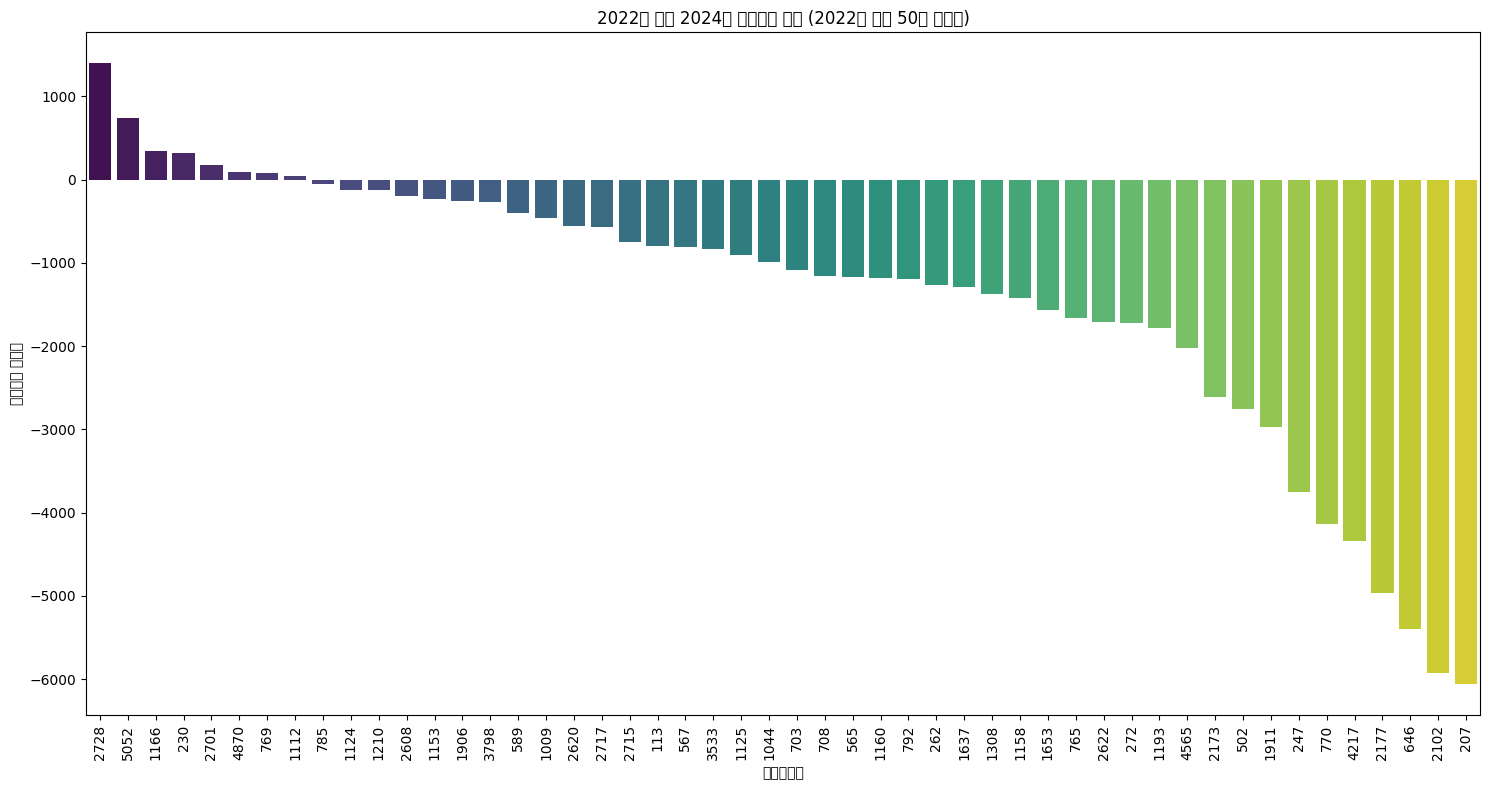

In [21]:
# 2022년 7월에 가장 많이 이용된 대여소 50개를 기준으로
# 2024년 7월의 이용 현황과 비교하여 얼마나 증가하거나 감소했는지를 분석

## 5.1 2022년 상위 50개 대여소의 2024년 이용현황 추출
# 2022년 데이터에서 대여소번호별 이용건수를 합산하고, 상위 50개를 추출

## 2022년 상위 50개 대여소의 2024년 변화 분석
# 2022년 7월 기준 가장 이용이 많았던 상위 50개 대여소를 기준으로,
# 2024년 7월 이용건수와 비교하여 **이용 증가/감소** 여부를 분석합니다.
# 결과는 막대 그래프로 시각화하여 대여소별 변화를 한눈에 파악할 수 있도록 합니다.

top50_2022 = df_2022.groupby('대여소번호')['이용건수'].sum().nlargest(50).reset_index()

# 2024년의 대여소번호별 이용건수를 미리 계산
usage_2024 = df_2024.groupby('대여소번호')['이용건수'].sum()

# 상위 50개 대여소와 2024년 데이터를 병합하여 비교 테이블 생성
comparison = top50_2022.merge(usage_2024, on='대여소번호', how='left', suffixes=('_2022', '_2024'))

# 이용건수의 절대 변화량과 변화율 계산
comparison['변화량'] = comparison['이용건수_2024'] - comparison['이용건수_2022']
comparison['변화율'] = (comparison['변화량'] / comparison['이용건수_2022']) * 100

## 5.2 변화 시각화
# 상위 50개 대여소의 이용건수 변화량을 막대그래프로 시각화
plt.figure(figsize=(15, 8))
sns.barplot(
    x='대여소번호',
    y='변화량',
    data=comparison.sort_values('변화량', ascending=False),
    palette='viridis'
)
plt.title('2022년 대비 2024년 이용건수 변화 (2022년 상위 50개 대여소)')
plt.xticks(rotation=90)
plt.ylabel('이용건수 변화량')
plt.xlabel('대여소번호')
plt.tight_layout()
plt.show()

# 분석 요약: 다수의 대여소에서 이용건수가 줄어든 반면, 특정 지역의 대여소에서는 오히려 증가함을 확인할 수 있음

## 결과 해석

- 대부분의 대여소에서 이용건수가 전반적으로 증가했으며, 특히 [상위 대여소명 에서 증가폭이 두드러졌습니다.
- 일부 대여소는 감소 추세를 보이는데, 이는 위치 특성이나 계절적 요인 등 외부 요인과 연관이 있을 수 있습니다.